In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

from pydmd import DMD
from pydmd.bopdmd import BOPDMD
from pydmd.plotter import plot_eigs, plot_summary

# Loading the data

In [2]:
_  = pd.read_csv('cdii.csv').drop(columns=['Unnamed: 0'])
Xn = _.values

t=np.linspace(0,230,24)

# Loading the names of the features (genes)

In [3]:
import pickle

with open('df_result_columns.pickle', 'rb') as file:
    gene_names = pickle.load(file)

In [4]:
def hard_threshold(X, gamma=0.01):
    # Hard thresholding for L0 norm.
    X[np.abs(X) ** 2 < 2 * gamma] = 0.0
    return X

def soft_threshold(X, gamma=0.05):
    # Soft thresholding for L1 norm.
    return np.sign(X) * np.maximum(np.abs(X) - gamma, 0.0)

In [6]:
from tqdm import tqdm
from tqdm import trange

N = 500
As = np.empty((1807, 1807, N))
del As

As = np.empty((1807, 1807, N))

for i in trange(N):

    bopdmd = BOPDMD(
    svd_rank=24,
    num_trials=0,
    trial_size=0.8,
    varpro_opts_dict={"verbose":False, "tol":0.8},
    eig_constraints={"imag"},
    use_proj=False,
    mode_proxy=hard_threshold, 
    compute_A=True
    )   
    perm = np.random.permutation(Xn.shape[1])
       
    bopdmd.fit(Xn[:, perm], t)
    
    As[:,:,i] = deepcopy(bopdmd.A)
    # As[:,:,i] = np.random.rand(1807, 1807)
    

  0%|          | 0/500 [00:00<?, ?it/s]/Users/fmenol/miniconda3/envs/dmd/lib/python3.8/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2670425974620899.5. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/var/folders/sg/6fb84wgs1cz_lnnmvn_x3qvm0000gn/T/ipykernel_16138/2770878896.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  As[:,:,i] = deepcopy(bopdmd.A)
  0%|          | 1/500 [00:02<21:16,  2.56s/it]/Users/fmenol/miniconda3/envs/dmd/lib/python3.8/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2730044004932097.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
  0%|          | 2/500 [00:05<24:47,  2.99s/it]/Users/fmenol/miniconda3/envs/dmd/lib/python3.8/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2427518205468667.5. Consider preprocessing d

In [10]:
import pickle

# Save As matrix as pickle
with open('As.pickle', 'wb') as file:
    pickle.dump(As, file)


: 

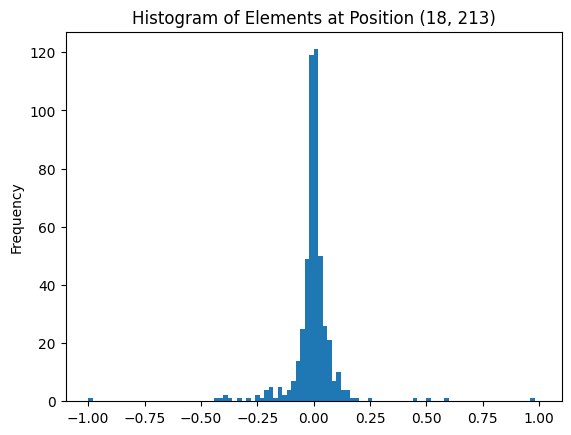

In [7]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(As[57,12,:].flatten(), bins=100, range=(-1, 1))
plt.ylabel('Frequency')
plt.title('Histogram of Elements at Position (18, 213)')
plt.show()


In [9]:
bopdmd = BOPDMD(
svd_rank=24,
num_trials=0,
trial_size=0.8,
varpro_opts_dict={"verbose":False, "tol":0.8},
eig_constraints={"imag"},
use_proj=False,
mode_proxy=hard_threshold,
compute_A=True
)


bopdmd.fit(Xn, t)
A = bopdmd.A

In [56]:
Asig = np.empty((1807,1807))

# Iterate through each element in A
for i in trange(A.shape[0]):
    for j in range(A.shape[1]):
        # Extract the distribution for the current element from As
        distribution = As[i, j, :]

        # Calculate the 5th and 95th percentiles of the distribution
        p5 = np.percentile(distribution, 1)
        p95 = np.percentile(distribution, 99)

        # Check if A[i, j] is in the first or last 5th percentile
        if A[i, j] <= p5 or A[i, j] >= p95:
            Asig[i, j] = 1

100%|██████████| 1807/1807 [04:47<00:00,  6.28it/s]


In [57]:
gene_mat = pd.read_csv('./data/gene_matrix_1807.csv', index_col=0)

In [58]:
Atrue_ = gene_mat.values
Atrue =np.abs(Atrue_)

In [59]:
from sklearn.metrics import confusion_matrix

c=confusion_matrix(Atrue.flatten(), Asig.flatten())


In [60]:
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(c)

print("Chi-squared statistics:", chi2)
print("p-value:", p_value)


Chi-squared statistics: 0.0
p-value: 1.0


In [61]:
c

array([[3264658,     126],
       [    465,       0]])